Neste notebook corre-se o modelo simples numa configuração inicial semelhate à da oposição de 2024-12-07. Os valores iniciais dos ângulos da Terra e de Io são, respetivamente 0 e -87,8099 (este valor foi obtido com o sistema Horizons da NASA). Pretende-se comparar os tempos das emergências e das ocultações calculados com o modelo com os simulados no stellarium.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime as dttm
import romer_utils as ru

Carregar a lista de emersões e ocultações do modelo

In [2]:
import model_errest as mde
em, oc = (mde.emerg, mde.occul)

In [3]:
mte=np.array([e[0] for e in em])
mto=np.array([e[0] for e in oc])

Tempos das ocultações e emersões no período sinódico de 2025 gerados pelo stellarium

In [83]:
from importlib import reload

In [84]:
reload(mde)

<module 'model_errest' from '/home/ljma/cloud/fis/202425/Romer/progs/model_errest.py'>

In [4]:
file = open("../data/all_events.dat",'r')
text = file.read()
file.close()
lines = text.split('\n')
ti = dttm.datetime.fromisoformat(lines[932][4:])
te=[]
to=[]
for i,line in enumerate(lines[933:-1]):
    if line[0]=="E":
        timestr = line[4:23]
        time = dttm.datetime.fromisoformat(timestr)
        te.append(time)
    elif line[0]=='O':
        timestr = line[4:23]
        time = dttm.datetime.fromisoformat(timestr)
        to.append(time)
ste = np.array([(t-ti).total_seconds() for t in te])
sto = np.array([(t-ti).total_seconds() for t in to])

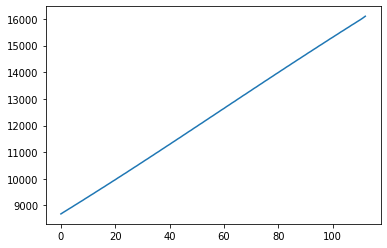

In [86]:
plt.plot(sto-mto);

152924.5357142857 4988286.850895195


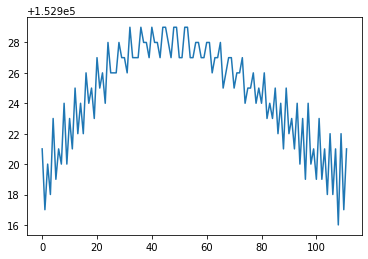

In [87]:
sTe=ste[1:]-ste[:-1]
print(sTe.mean(), ste.std())
plt.plot(sTe);

Médias deslizantes para tentar suavizar os dados do stellarium

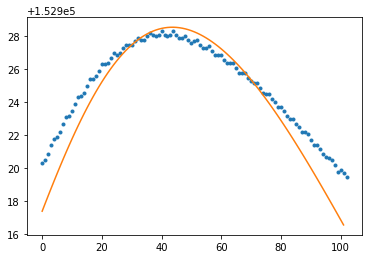

In [88]:
ste_ra = np.convolve(ste[1:]-ste[:-1], np.ones(10)/10, mode='valid')
plt.plot(ste_ra,'.',1.0004*(mte[1:]-mte[:-1])[5:-5],'-');

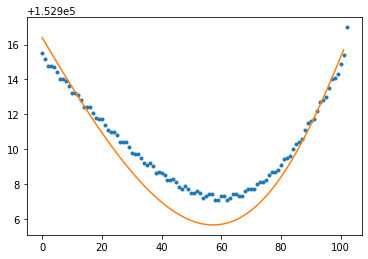

In [89]:
sto_ra = np.convolve(sto[1:]-sto[:-1], np.ones(10)/10, mode='valid')
plt.plot(sto_ra,'.',15350+0.9*(mto[1:]-mto[:-1])[5:-5],'-');

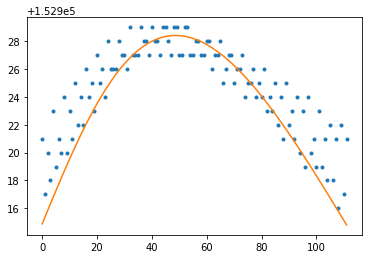

In [94]:
plt.plot(ste[1:]-ste[:-1],'.',61+mte[1:]-mte[:-1],'-');

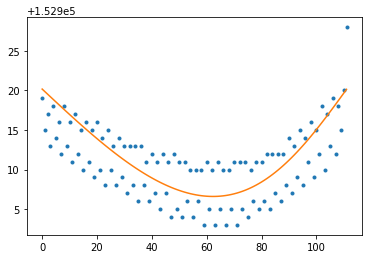

In [97]:
plt.plot(sto[1:]-sto[:-1],'.',67+mto[1:]-mto[:-1],'-');

In [98]:
ste[0]-mte[0]

np.float64(-1914.7581602059945)

In [99]:
em[0]

[45194.758160205994, 4.202779643430031, 4.202711592187653, 4.200042028891751]

In [101]:
(2*ru.AU/ru.C)/60

16.633492794538547

In [3]:
em[0]

[47054.56243875667, 4.202783119689093, 4.202715042278158, 4.200045559434358]

In [5]:
ste[0]

np.float64(43280.0)